In [1]:
import re
import os
import cairosvg
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

Using TensorFlow backend.


In [2]:
l_samp = !ls ./dataset/*vehicles/*/*

M_ClassDict = {"non-vehicles" : 0, "vehicles" : 1}
pd_SampClass = pd.DataFrame({
    "Sample" : l_samp, 
    "Class"   : list(map(lambda x: M_ClassDict[x], list(map(lambda x: x.split("/")[2], l_samp))))
})[['Sample', 'Class']]
pd_SampClass_train,pd_SampClass_cv = train_test_split(pd_SampClass, test_size=0.33, random_state=42)
pd_SampClass_train.head()

,Sample,Class
6490,./dataset/non-vehicles/GTI/image2279.png,0
2736,./dataset/non-vehicles/Extras/extra3857.png,0
15541,./dataset/vehicles/KITTI_extracted/4374.png,1
1068,./dataset/non-vehicles/Extras/extra223.png,0
3660,./dataset/non-vehicles/Extras/extra4821.png,0


In [3]:
l_imagepath = pd_SampClass_train['Sample'][0:32]
def get_image(path, shape=None):
    image = cv2.imread(path)
    image = image[:,:,::-1]
    if shape != None:
        image = cv2.resize(image, shape)
    return image


l_img = []
for imagepath in l_imagepath:
    img = get_image(imagepath)
    l_img.append(img)

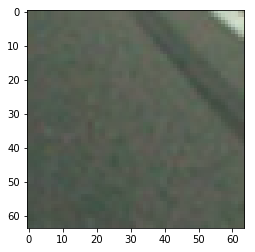

In [4]:
plt.imshow(l_img[0])

In [5]:
def image_generator(pd_input, shape=(64,64), batch_size=32):
    num_samples = pd_input.shape[0]
    while 1:
        pd_input_shuffle = shuffle(pd_input)
        for offset in range(0, num_samples, batch_size):
            l_x = []
            l_y = []
            for idx in range(batch_size):
                batch_samples = pd_input_shuffle.iloc[offset:offset+batch_size]
                try:
                    path  = batch_samples.iloc[idx]['Sample']
                    label = batch_samples.iloc[idx]['Class']
                    image = get_image(path, shape)
                    l_x.append(image)
                    l_y.append(label)
                except:
                    pass
            
            np_x = np.array(l_x)
            np_y = np.array(l_y)
            print(np_x.shape)
            yield shuffle(np_x, np_y)
            
g = image_generator(pd_SampClass_train)

(32, 64, 64, 3)


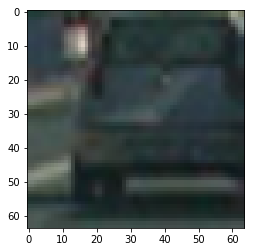

In [6]:
a,b = next(g)
plt.imshow(a[1])

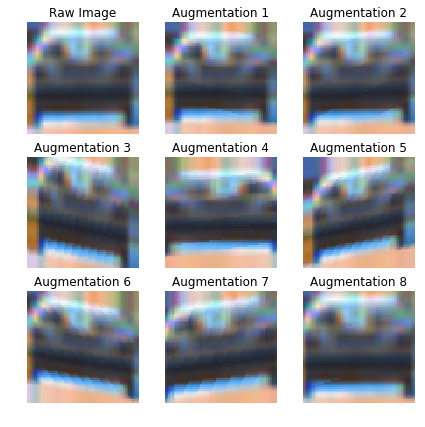

In [7]:
l_imagepath = ['./dataset/vehicles/KITTI_extracted/4374.png']
l_img = []
for imagepath in l_imagepath:
    img = get_image(imagepath)
    l_img.append(img)

np.random.seed(0)
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow(np.array(l_img))

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(3,3,1)
ax.imshow(l_img[0])
ax.set_axis_off()
ax.set_title("Raw Image")
for i in range(8):
    imgs = next(train_generator)
    ax = fig.add_subplot(3,3,i+2)
    ax.imshow(imgs[0])
    ax.set_axis_off()
    ax.set_title("Augmentation %d" % (i+1))